In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_orig = pd.read_csv('archive/household_power_consumption.txt',sep = ';')

df = df_orig.copy()

In [4]:
df.head(3)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0


In [5]:
for i in df.columns[2:]:
    df[i] = pd.to_numeric(df[i], errors='coerce')
    df = df.dropna(subset=[i])

In [6]:
df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['date_time']=pd.to_datetime(df['date_time']) 

In [7]:
df['year'] = df['date_time'].apply(lambda x: x.year)

In [8]:
df.head(2)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time,year
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006


In [9]:
df.sort_values('date_time', inplace=True, ascending=True)
df.head(2)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time,year
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006


Text(0.5, 1.0, 'Global Active Power by Month')

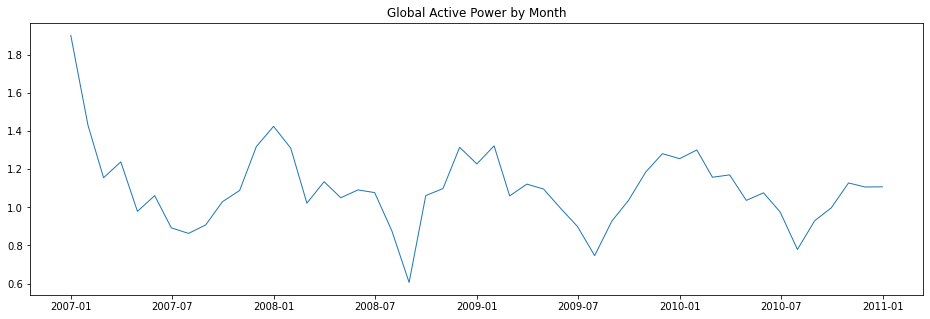

In [10]:
global_active_power_df=df.loc[:,['date_time','Global_active_power']]
global_active_power_df.set_index('date_time',inplace=True)

fig = plt.figure(figsize=(16,5))
plt.plot(global_active_power_df['Global_active_power'].resample('M').mean(),linewidth=1)
plt.title('Global Active Power by Month')

Text(0.5, 1.0, 'Global Reactive Power by Month')

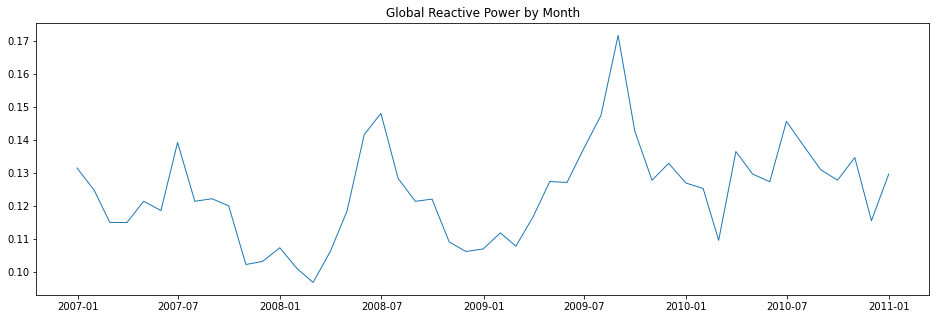

In [11]:
global_reactive_power_df=df.loc[:,['date_time','Global_reactive_power']]
global_reactive_power_df.set_index('date_time',inplace=True)
fig = plt.figure(figsize=(16,5))

plt.plot(global_reactive_power_df['Global_reactive_power'].resample('M').mean(),linewidth=1)
plt.title('Global Reactive Power by Month')

Text(0.5, 1.0, 'Voltage by Month')

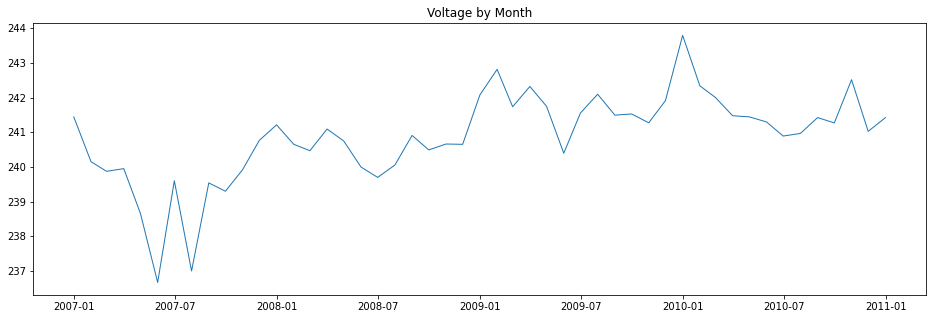

In [12]:
voltage_df=df.loc[:,['date_time','Voltage']]
voltage_df.set_index('date_time',inplace=True)
fig = plt.figure(figsize=(16,5))

plt.plot(voltage_df['Voltage'].resample('M').mean(),linewidth=1)
plt.title('Voltage by Month')

In [13]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'date_time', 'year'],
      dtype='object')

Text(0.5, 1.0, 'Global_intensity by Month')

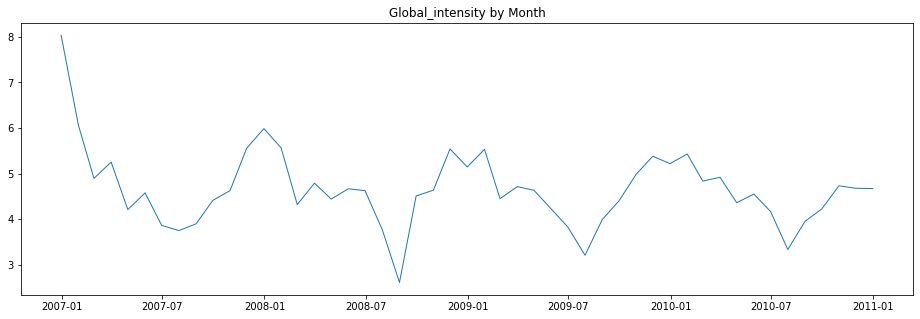

In [14]:
Global_intensity_df=df.loc[:,['date_time','Global_intensity']]
Global_intensity_df.set_index('date_time',inplace=True)
fig = plt.figure(figsize=(16,5))

plt.plot(Global_intensity_df['Global_intensity'].resample('M').mean(),linewidth=1)
plt.title('Global_intensity by Month')

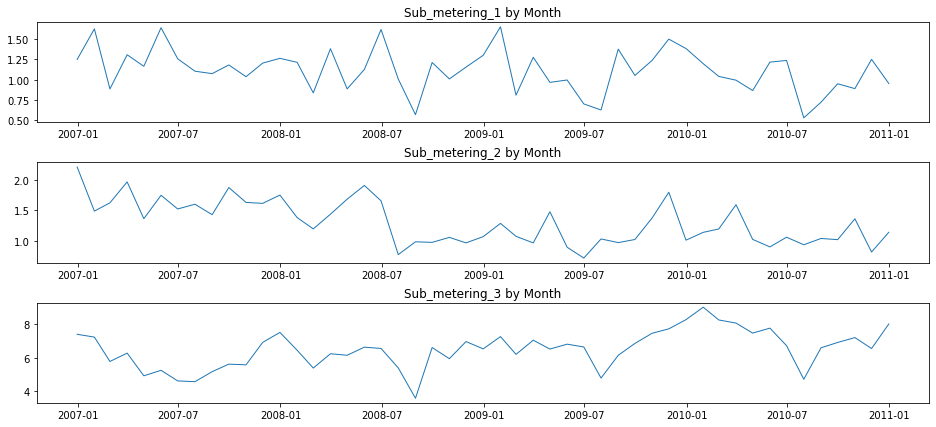

In [15]:
Sub_metering_1_df=df.loc[:,['date_time','Sub_metering_1']]
Sub_metering_1_df.set_index('date_time',inplace=True)

Sub_metering_2_df=df.loc[:,['date_time','Sub_metering_2']]
Sub_metering_2_df.set_index('date_time',inplace=True)

Sub_metering_3_df=df.loc[:,['date_time','Sub_metering_3']]
Sub_metering_3_df.set_index('date_time',inplace=True)

fig, axs = plt.subplots(3, figsize=(16,7))
axs[0].plot(Sub_metering_1_df['Sub_metering_1'].resample('M').mean(),linewidth=1)
axs[0].set_title('Sub_metering_1 by Month')

axs[1].plot(Sub_metering_2_df['Sub_metering_2'].resample('M').mean(),linewidth=1)
axs[1].set_title('Sub_metering_2 by Month')

axs[2].plot(Sub_metering_3_df['Sub_metering_3'].resample('M').mean(),linewidth=1)
axs[2].set_title('Sub_metering_3 by Month')

plt.subplots_adjust(wspace=0.4, 
                    hspace=0.4)

In [16]:
df['week'] = df['date_time'].dt.day_name()
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time,year,week
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,Saturday
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,Saturday
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,Saturday
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,Saturday
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,Saturday


In [17]:
df.groupby(['week']).mean().sort_values(by=['Global_active_power'], ascending=False)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year
week,,,,,,,,
Saturday,1.188930,0.132144,240.740557,5.040234,1.413894,1.434029,7.057400,2008.427122
Sunday,1.172412,0.133336,240.841644,4.976901,1.571136,1.682974,6.120234,2008.412947
Tuesday,1.085184,0.120861,240.840799,4.601212,0.917859,1.344227,6.402883,2008.422114
Wednesday,1.075317,0.120688,240.830829,4.555090,1.104137,1.466963,6.362677,2008.426358
Friday,1.066943,0.122000,240.869483,4.522497,1.006803,1.093023,6.677934,2008.430365
Monday,1.030471,0.118505,240.838039,4.369758,0.921507,1.130847,6.363544,2008.420030
Thursday,1.024164,0.118688,240.916339,4.337706,0.926948,0.943617,6.227856,2008.434222


In [18]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time,year,week
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,Saturday
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,Saturday
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,Saturday
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,Saturday
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,Saturday


In [19]:
df2 = df.copy()

In [20]:
df2.head(2)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time,year,week
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,Saturday
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,Saturday


In [21]:
df3 = df2.drop(['Date', 'Time', 'week', 'year'],axis=1)
df3.head(1)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00


In [22]:
test_df = df3.set_index('date_time')

In [23]:
test_df.head(1)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0


In [55]:
test_df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [24]:
df['year'].unique()

array([2006, 2007, 2008, 2009, 2010], dtype=int64)

In [25]:
df4 = df3.copy()
df4.head(1)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00


In [26]:
df4['date_time'] = pd.to_numeric(df['date_time'])

In [27]:
df4.head(1)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,1166289840000000000


In [28]:
df4.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'date_time'],
      dtype='object')

In [29]:
from sklearn.model_selection import train_test_split

X = df4[['Global_active_power', 'Global_reactive_power', 'Voltage','Sub_metering_1', 'Sub_metering_2',
                       'Sub_metering_3', 'date_time']]
y = df4['Global_intensity']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

In [42]:
split_date =pd.to_datetime( '2009-12-16')
df_train = test_df.loc[test_df.index <= split_date].copy()
df_train.shape

(1568847, 7)

In [43]:
df_test = pd.DataFrame(test_df.loc[test_df.index > split_date])
df_test.shape

(480433, 7)

In [44]:
X_train, y_train = df_train.iloc[:,1:],df_train.iloc[:,0]
X_test, y_test = df_test.iloc[:,1:],df_test.iloc[:,0]

In [45]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error

In [46]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

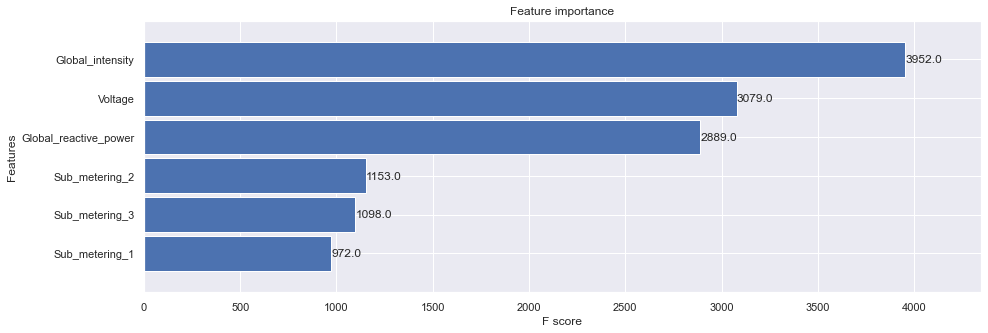

In [47]:
f, ax = plt.subplots(figsize=(15,5))
_ = plot_importance(reg, height=0.9,ax = ax)
plt.show()

In [48]:
df_test['Prediction'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)

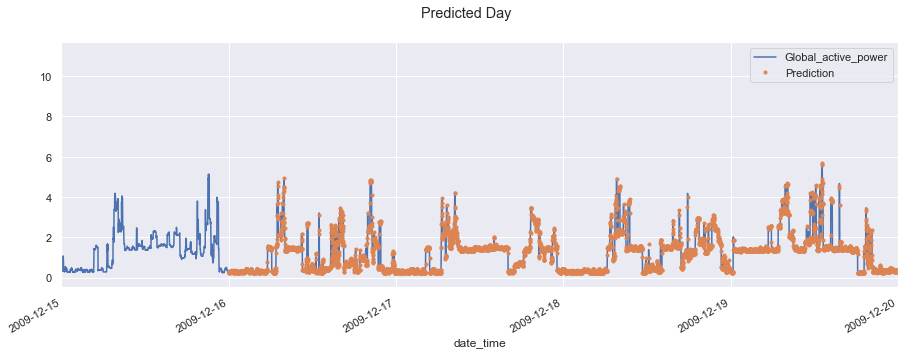

In [51]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['Global_active_power','Prediction']].plot(ax=ax,style=['-','.'])
ax.set_xbound(lower='12-15-2009', upper='12-20-2009')
plot = plt.suptitle('Predicted Day')
plt.show()